In [1]:
import cricket_ball as ball

<IPython.core.display.Javascript object>

# Modelling the Trajectory of a Cricket Ball

<img src="wasim-akram.jpg" width=500> 

### Have you ever wondered how the ball that led to your team's victory came into play? Or have you ever played cricket in the rain and wondered why you scored more wickets than you usually would? Or have you ever just wondered how the spinning axes affect the ball? 

If you are thinking about any of these questions or you just want to understand cricket better, you have come to the right place. 

## Background

On the 66 ft long pitch in the center of a cricket field, the batsman must defend the fragile wicket from the bowler on the other end of the pitch. The bowler bowls a ball towards the wicket with an aim to deceive the batsman into missing the ball. If the batsman misses the ball, he is disqualified as a batsman for the remaining match resulting in an upper hand for the bowling team. The bowler’s success in doing so can be estimated by the trajectory of his bowling as it shows where the ball hit the pitch, whether it spun or not, and how well-aimed it was towards the wicket. There are several factors which affect this and sometimes, they are not in the players’ control. The aim of this project is to simulate the trajectory of a bowled cricket ball while also observing the effect of these factors. 

The two most common types of bowling are either fast bowling or spin bowling. Both the strategies are used to deceive the batsman as the spin deviates the ball in an unexpected deviation and the speed may intimidate the batsman into missing the shot. In this project, we will observe the trajectories of a mix of the two types. 

## The Physics Behind Cricket Bowling 

The equations for any cricket ball in motion are as follows [1]:

$$\begin{eqnarray}
\frac{d^2 x}{dt^2} = -k_Dvv_x+k_L(w_y v_z-w_z v_y)\\
\frac{d^2 y}{dt^2} = -k_Dvv_y +k_L(w_z v_x-w_x v_z)\\
\frac{d^2 z}{dt^2}= -k_Dvv_z +k_L(w_x v_y-w_y v_x)-g\\
\end{eqnarray}$$

The origin for the equations is on the ground, at the center of the wicket at the bowler’s end. The x-axis is parallel to the wickets, pointing towards the batsman. The z-axis points vertically upwards. The velocity components are $v_x, v_y, v_z$ and the components of the spin are $w_x, w_y, w_z$. $v$ is the square root of the sum of the squares of each component. $k_D$ and $k_L$ are constants where 
$$k_D=(C_D pA)/(2m)$$ and 
$$k_L=(C_L pA)/(2m)$$ 
$C_D$  and $C_L$ are constants as well.

After the ball hits the ground, the velocity after the bounce will have two components. One due to the velocity before the bounce and the other, due to the spin of the ball before the bounce. The velocity resulting from the speed is $v$ after the bounce where 

$$v = <v_x, v_y, -e.v_z>$$ 

Here, $e$ is the coefficient of restitution (approx. 0.32). After the bounce, the velocity resulting from the spin will be 

$$-cw ⃗⋅(-Rk ̂ )=cR(w_y i ̂-w_x j ̂ )$$ 

where $R$ is the radius of the ball and $0≤c≤1$, depending on the amount of slipping relative to the ground (moisture on the pitch). If the pitch is hard and dry, c is close to 0, and if the pitch is wet, c is close to 1. If the pitch is moist, the grip of the ball increases and it is advantageous for the bowler as the ball has a greater spin. 

In summary, the velocity of the ball after the bounce is

$$v ⃗=(v_x+cRw_y)i ̂+(v_y-CRw_x)j ̂-(ev_z)  k ̂.$$ 
 
where $v_x, v_y, v_z$ refer to velocity components just before the bounce.


## Methods 

For the equations described above, we use 0.116 ft for the radius of the ball and 0.344 lb as its weight. We thus know that  $(pA)/(2m)$ is 0.00461 and $p$ = 0.075 lb/square foot. This makes $C_D$ = 0.4 and $C_L$= 0.116. We will also set starting positions for the ball delivery according to the size of the pitch, e.g. $x$=1, $y$=2, $z$=7 are appropirate values. We then vary the values of the speed and spin of the ball to test different cases for fast and spin bowling. Using Newton’s method, we record the position of the bounce and the velocity components just before it (when $z$=0) and then use these values to estimate the trajectory after the bounce. 

Since our investigation involves differential equations, we solve the bowling equations using the fourth order Runge-Kutta method (RK4) where the motion of a ball experiencing forces can be modeled on high accuracy [2]. RK4 will be the best algorithm to use as it has minimum error and maximum speed (the computation size is minimal). 

Lastly, we create graphs of the trajectory using Pylab and Axes3D (graphic packages imported on Python 3) and record the data. Then, using the same data, we model the trajectory of the ball on a simulation of an actual pitch and visualize the effects of varying speed, and spin using VPython (3-D graphics module for Python 3). 

In [2]:
# The user defines the original velocity and spin components of the ball

# the initial velocity components 
vx_0 = 80 #ft/sec (between 70 and 150)
vy_0 = -1 #ft/sec
vz_0 = 0 # ft/sec (vertical component)
    
# the initial ball spin components 
wx = -50.0 # rad/sec (spin in x direction)
wy = 0 #rad/sec (spin in y direction)
wz = 0 #rad/sec (spin in z direction)

## Results

First, we plot a ball with $v_x$ = 80, $v_y$ = -1, and $v_z$ = 0 ft/sec. We also give it a spin of -50 rad/sec in the $x$ direction. This gives the ball an unexpected deviation. The pitch moisture is set to 0.1 (dry).

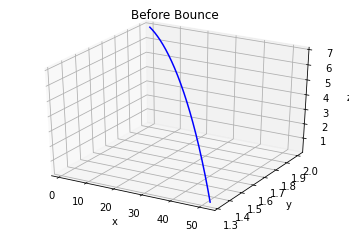

In [3]:
# Draws the trajectory of the ball before it bounces (till it reaches the ground i.e. z = 0 or the end of pitch)
x_f,y_f,z_f,vx_f,vy_f,vz_f,x_bef,y_bef,z_bef = ball.before_bounce(vx_0,vy_0,vz_0,wx,wy,wz)

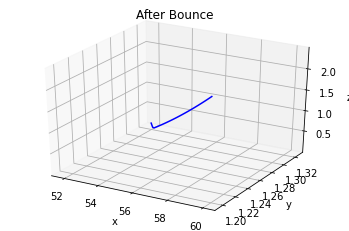

In [4]:
# Draws the trajectory of the ball after it bounces and reaches the batsman/wicket
x_af,y_af,z_af = ball.after_bounce(x_f,y_f,z_f,vx_f,vy_f,vz_f,wx,wy,wz)
x_bef.extend(x_af)
y_bef.extend(y_af)
z_bef.extend(z_af) #extends the lists to contain the ball's total trajectory 

Next, we present a 3-D plot of the same trajectory. We make this plot using Axes3D and add the y-component of the distance to it. This plot more clearly shows us the effect of the spin. We also have the $z$ (vertical distance) vs $x$ (horizontal distance) plot of the ball. We have attained this using pylab and it represents the ball's motion as it leaves the bowler's hand and reaches the batsman.

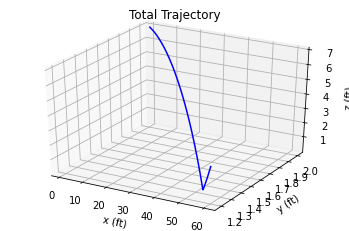

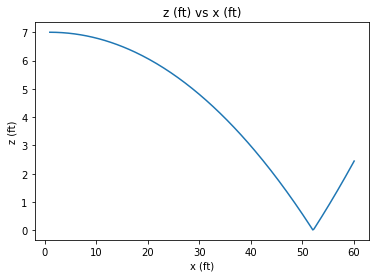

In [5]:
# Plots the total trajectory of the ball (from when it leaves the bowler till it reaches the batsman)
ball.plots(x_bef,y_bef,z_bef)

In [6]:
# Creates a simulation of the ball's trajectory across an animated cricket pitch. 
#ball.animation(x_bef,y_bef,z_bef)

#### Comparing Simulated Trajectories
Finally, using VPython and the data used in the 3-D plot (x, y, and z components of the distance along the pitch), we simulate the trajectory on an animated cricket pitch. The vertical, white boxes on both ends represent the two wickets. The aim of the bowler should be to strike them.

For the first figure, we have the same trajectory as for the 2-D and 3-D plots and use the same velocity and spin components. We can see that such a ball is likely to strike the wicket smoothly. The spin increases the chances of the batsman missing the shot. 

##### Fig. 1
<img src="vpython_ball_traj_edited.PNG" width=500> 


For the second figure, we have reduced the spin in the x-direction to 0 and increased it in the $y$-direction to 200 rad/sec. The other velocity, position, and spin components are left unchanged. This animation shows how such a spin can cause the bowler to miss the wicket. However, this can also be advantageous for him as the batsman is also more likely to miss higher balls.

##### Fig. 2
<img src="vpython_ball_traj_missed.PNG" width=500> 


The third figure represents a fast ball with minimum spin. This ball has a velocity of 100 ft/sec in the $x$-direction and no spin in any direction. The other velocity, position, and spin components are left unchanged.  This animation shows that such a ball can result in a full toss ball which is a useful intimidation tactic. However, if it reaches the batsman above the waist, it can result in a penalty. Thus, this is a risky bowling technique. 

##### Fig. 3
<img src="vpython_ball_traj_fast.PNG" width=500>

These animations show how varying the speed and spin components affects the bowling trajectories. We are able to observe the differences in them and find the components which lead to a seemingly "perfect" ball. The actual perfection would also have to depend on the batsman's ability to play it. However, using these trajectories, we can maximize the chances of the batsman missing the ball. 

We have not changed the pitch moisture in our models as it resulted in little to no change. If the acceptable error value is reduced, the model may be modified to show its effect as well. This can be tried in future. 

### Conclusions

These results allow us to successfully model the trajectory of a cricket ball, whether it is fast, spun, or both. In future, these results can be applied to actual matches by using data from known bowlers (the average speed and spin of their bowling) and applying the apparent weather conditions to input the pitch moisture. This will enable us to effectively model each bowler’s bowling trajectory accordingly. The results can then be improved and used for cases of an LBW (leg before wicket) as the trajectory model can help determine whether the ball was actually going to hit the wicket or not. The modelling can also be used in virtual cricket games to successfully determine bowling trajectories. 

<img src="shoaib-akhtar759.jpg" width=500>

### References
[1]  Robinson, Garry, and Ian Robinson. “The Motion of an Arbitrarily Rotating Spherical Projectile and Its Application to Ball Games.” Physica Scripta, vol. 88, no. 1, 2013, doi:10.1088/0031-8949/88/01/018101.

[2]  Newman, Mark. Computational Physics. University of Michigan Publishing, 2012

https://propakistani.pk/2020/04/17/a-throwback-to-all-of-wasim-akrams-milestone-wickets-video/

https://www.indiatoday.in/sports/cricket/story/shoaib-akhtar-on-kapil-dev-coronavirus-crisis-india-pakistan-relief-series-1666000-2020-04-11